# FitBit Data EDA

This EDA explores data based on fitbit users and we try to uncover basic trends and analysis

In [19]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [20]:
# importing the dataset
activity = pd.read_csv('D:\Portfolio\Python EDA\Fitbit_EDA\FitBit data.csv')

In [21]:
activity.shape

(457, 15)

In [22]:
# checking for missing values
activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [23]:
# seeing the first 10 rows of the dataset
activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [24]:
#creating a copy of the dataset
activity1 = activity.copy()

In [25]:
# adding new columns for year, month, date and day of the week
activity1['year'] = pd.DatetimeIndex(activity1['ActivityDate']).year
activity1['month'] = pd.DatetimeIndex(activity1['ActivityDate']).month
activity1['date'] = pd.DatetimeIndex(activity1['ActivityDate']).day


# creating a new column for total active minutes
activity1['TotalActiveMinutes'] = activity1['VeryActiveMinutes'] + activity1['FairlyActiveMinutes'] + activity1['LightlyActiveMinutes']

In [26]:
# verifying the data transformation
activity1.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,TotalActiveMinutes
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,250
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,380
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,329
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,283
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,299
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,266
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,284
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,268
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,295
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,359


In [27]:
# dropping the columns which are not required
activity1=activity1.drop(['TrackerDistance'],axis=1)

In [28]:
activity1.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,TotalActiveMinutes
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,250
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,380
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,329
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,283
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,299
5,1503960366,3/30/2016,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,266
6,1503960366,3/31/2016,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,284
7,1503960366,4/1/2016,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,268
8,1503960366,4/2/2016,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,295
9,1503960366,4/3/2016,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,359


### Data Visualization

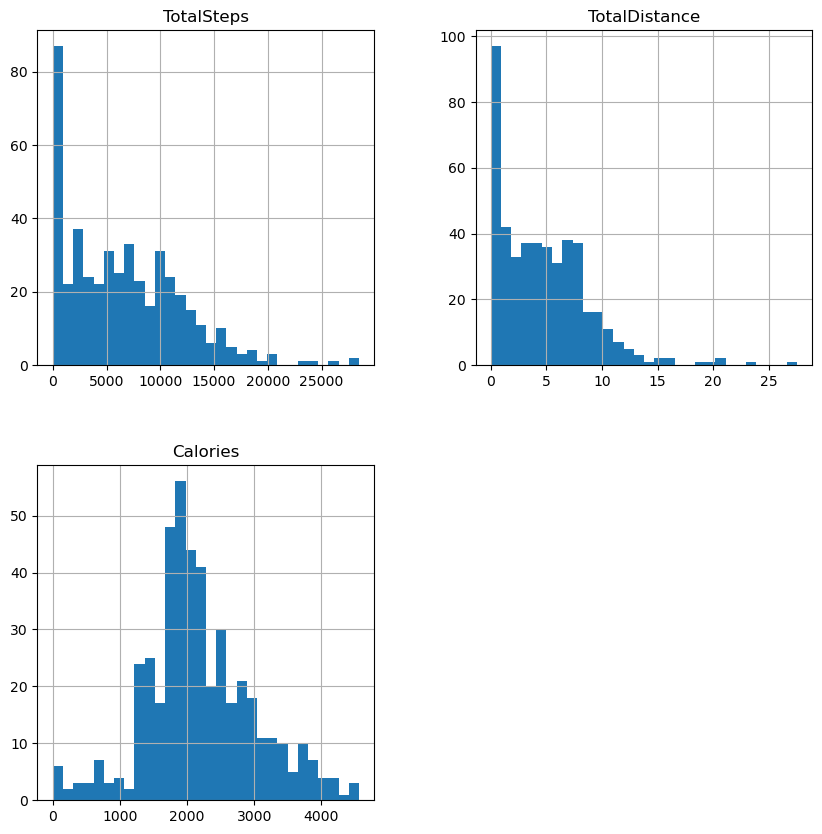

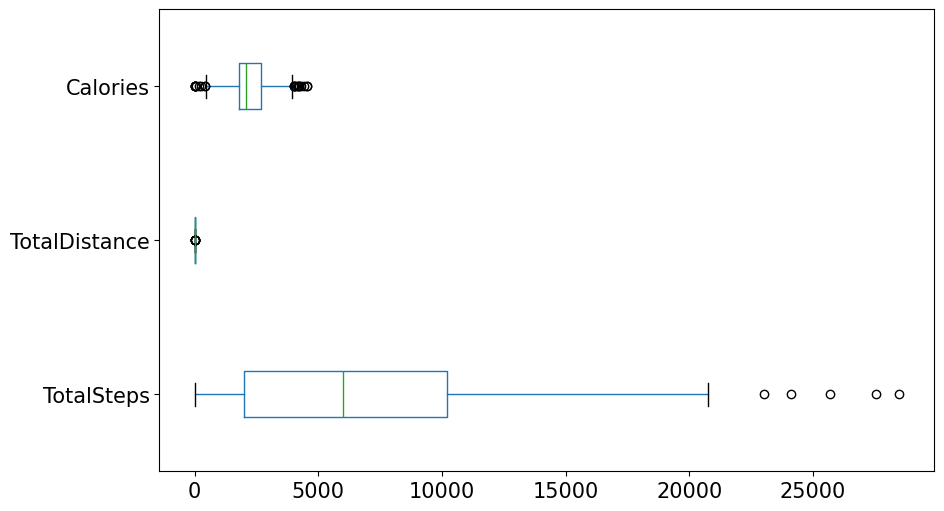

In [29]:
# Create histograms
activity1[['TotalSteps', 'TotalDistance', 'Calories']].hist(bins=30, figsize=(10,10))
plt.show()

# Create boxplots
activity1[['TotalSteps', 'TotalDistance', 'Calories']].boxplot(grid=False, vert=False, fontsize=15, figsize=(10,6))
plt.show()

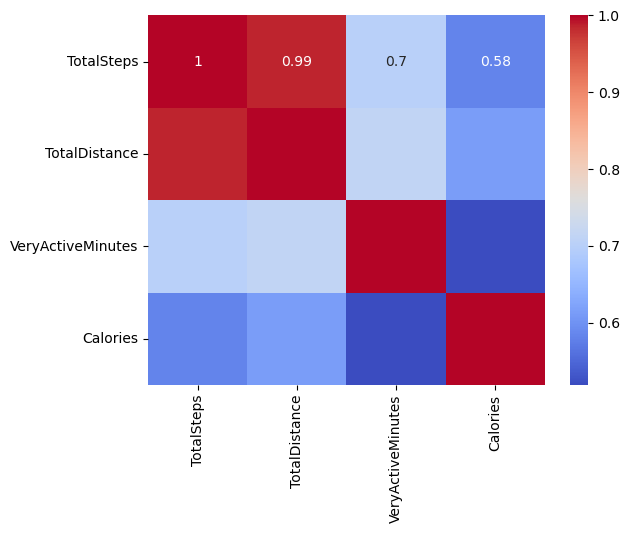

In [30]:
import seaborn as sns

# Calculate the correlation matrix
corr = activity1[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'Calories']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

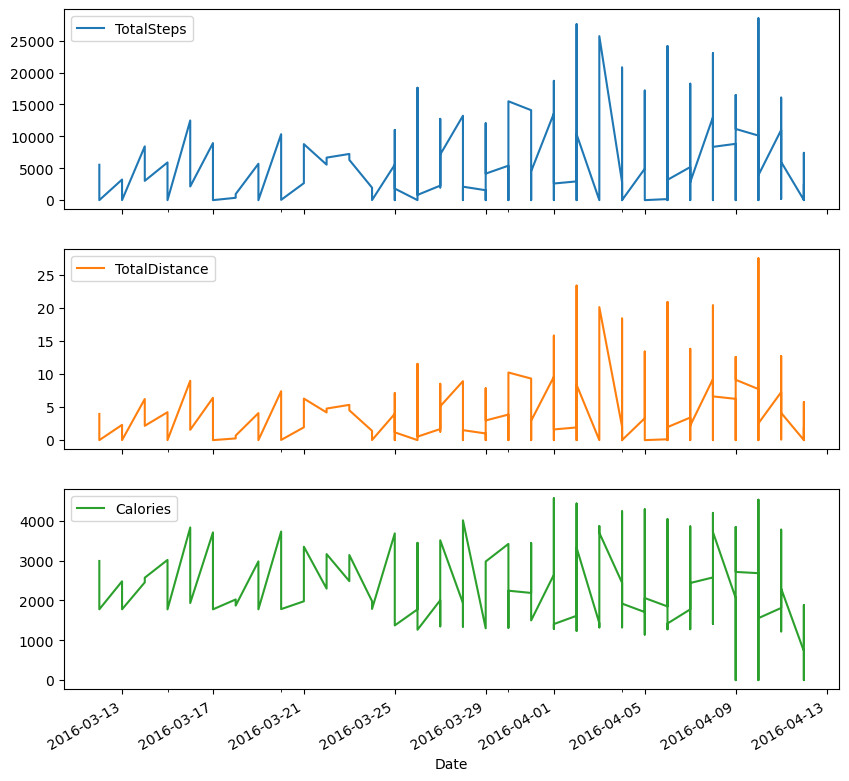

In [31]:
# Convert the date column to datetime format
activity1['Date'] = pd.to_datetime(activity1['ActivityDate'])

# Set the date column as the index
activity1.set_index('Date', inplace=True)

# Plot TotalSteps, TotalDistance, Calories over time
activity1[['TotalSteps', 'TotalDistance', 'Calories']].plot(subplots=True, layout=(3,1), figsize=(10,10))

plt.show()

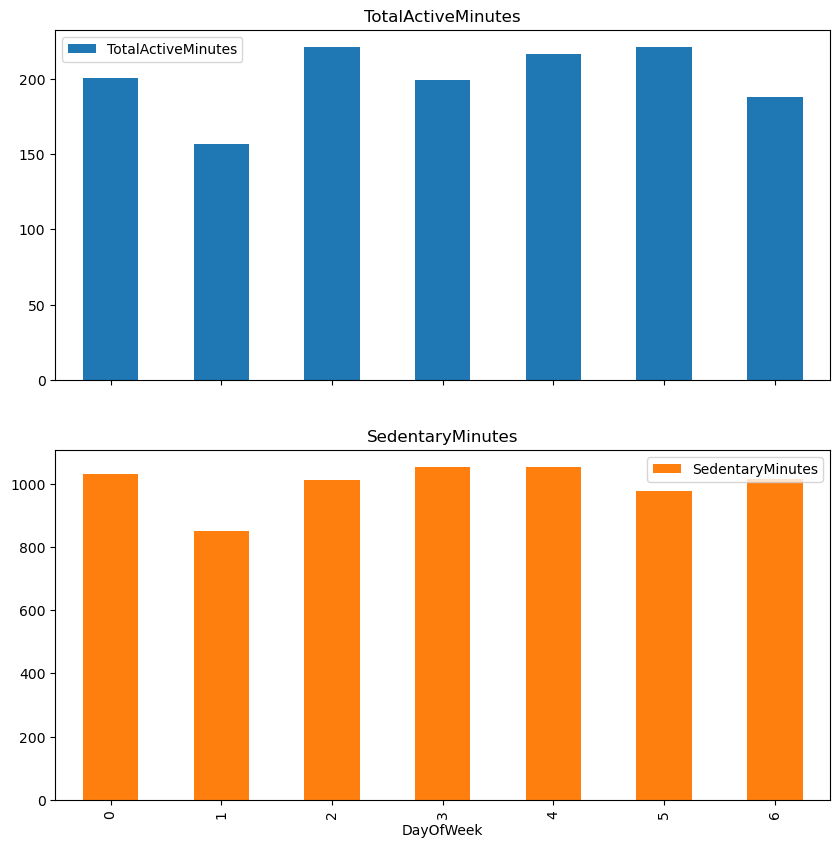

In [34]:
activity1['DayOfWeek'] = activity1.index.dayofweek
# Calculate the mean of 'ActiveMinutes' and 'SedentaryMinutes' for each day of the week
average_activity = activity1.groupby('DayOfWeek')[['TotalActiveMinutes', 'SedentaryMinutes']].mean()

# Calculate the mean of 'ActiveMinutes' and 'SedentaryMinutes' for each day of the week
average_activity = activity1.groupby('DayOfWeek')[['TotalActiveMinutes', 'SedentaryMinutes']].mean()

# Plot the average 'ActiveMinutes' and 'SedentaryMinutes' over the days of the week
average_activity.plot(kind='bar', subplots=True, layout=(2,1), figsize=(10,10))

plt.show()

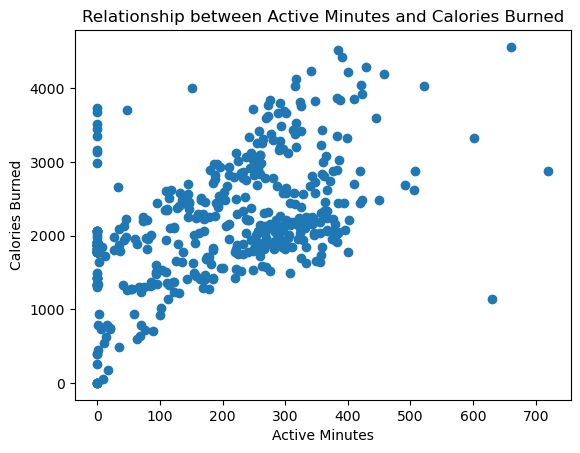

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'ActiveMinutes' vs 'Calories'
plt.scatter(activity1['TotalActiveMinutes'], activity1['Calories'])
plt.xlabel('Active Minutes')
plt.ylabel('Calories Burned')
plt.title('Relationship between Active Minutes and Calories Burned')

plt.show()

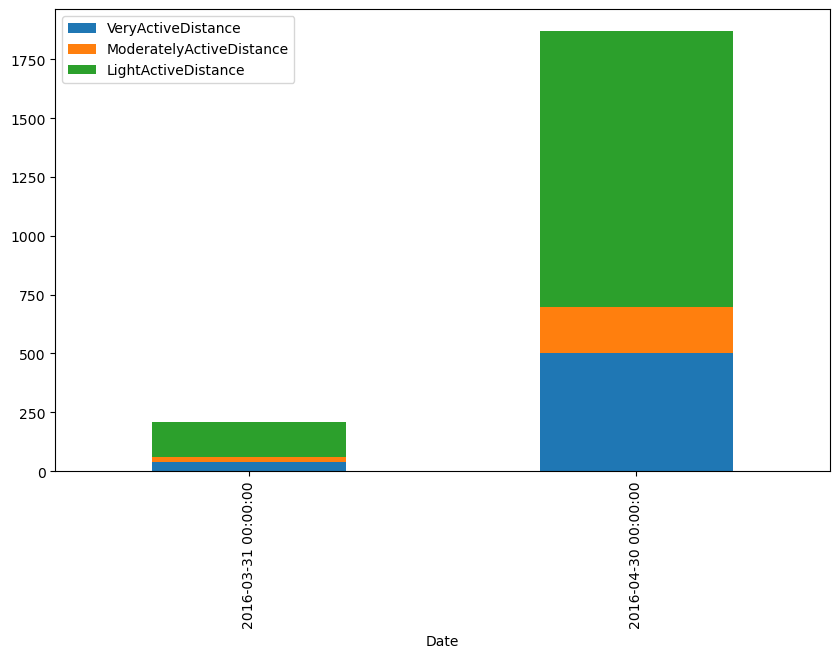

In [36]:
# Group data by day and calculate the sum
daily_data = activity1.resample('m')[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum()

# Create a stacked bar chart
daily_data.plot(kind='bar', stacked=True, figsize=(10,6))

plt.show()

## Findings

In [37]:
import matplotlib.pyplot as plt

# Identify days with the highest 'TotalSteps' and 'TotalDistance'
max_steps_day = activity1['TotalSteps'].idxmax()
max_distance_day = activity1['TotalDistance'].idxmax()

print(f"Day with highest 'TotalSteps': {max_steps_day}")
print(f"Day with highest 'TotalDistance': {max_distance_day}")


Day with highest 'TotalSteps': 2016-04-10 00:00:00
Day with highest 'TotalDistance': 2016-04-10 00:00:00


                   TotalSteps  VeryActiveMinutes  Calories
TotalSteps           1.000000           0.699699  0.581380
VeryActiveMinutes    0.699699           1.000000  0.518905
Calories             0.581380           0.518905  1.000000


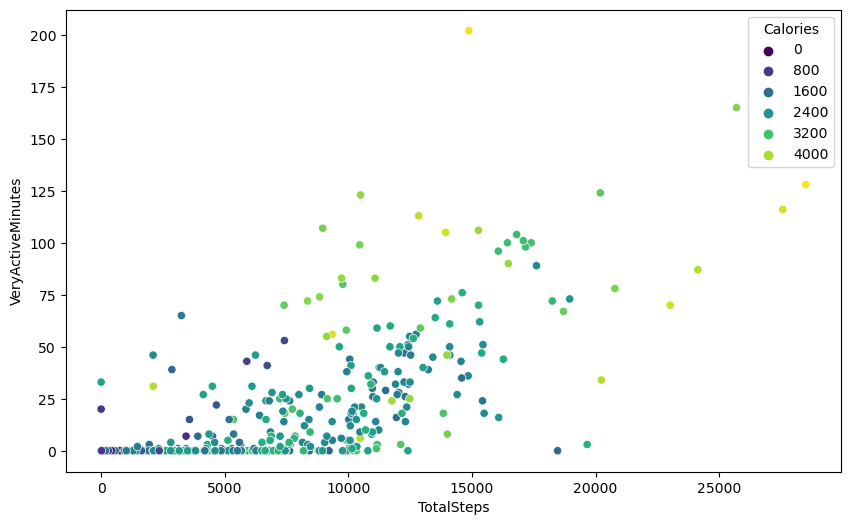

In [38]:
import seaborn as sns

# Examine the correlation between 'TotalSteps', 'VeryActiveMinutes', and 'Calories'
correlation = activity1[['TotalSteps', 'VeryActiveMinutes', 'Calories']].corr()
print(correlation)

# Use scatter plots with 'TotalSteps' and 'VeryActiveMinutes' on the axes and color-coded by 'Calories'
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalSteps', y='VeryActiveMinutes', hue='Calories', palette='viridis', data=activity1)
plt.show()

In [39]:
import matplotlib.pyplot as plt

# Identify days when 'FairlyActiveMinutes' and 'LightlyActiveMinutes' are unusually high
fairly_active_high_days = activity1[activity1['FairlyActiveMinutes'] > activity1['FairlyActiveMinutes'].mean()]
lightly_active_high_days = activity1[activity1['LightlyActiveMinutes'] > activity1['LightlyActiveMinutes'].mean()]

print(f"Number of days when 'FairlyActiveMinutes' are unusually high: {len(fairly_active_high_days)}")
print(f"Number of days when 'LightlyActiveMinutes' are unusually high: {len(lightly_active_high_days)}")


Number of days when 'FairlyActiveMinutes' are unusually high: 139
Number of days when 'LightlyActiveMinutes' are unusually high: 240


                   VeryActiveMinutes  SedentaryMinutes
VeryActiveMinutes           1.000000         -0.177652
SedentaryMinutes           -0.177652          1.000000


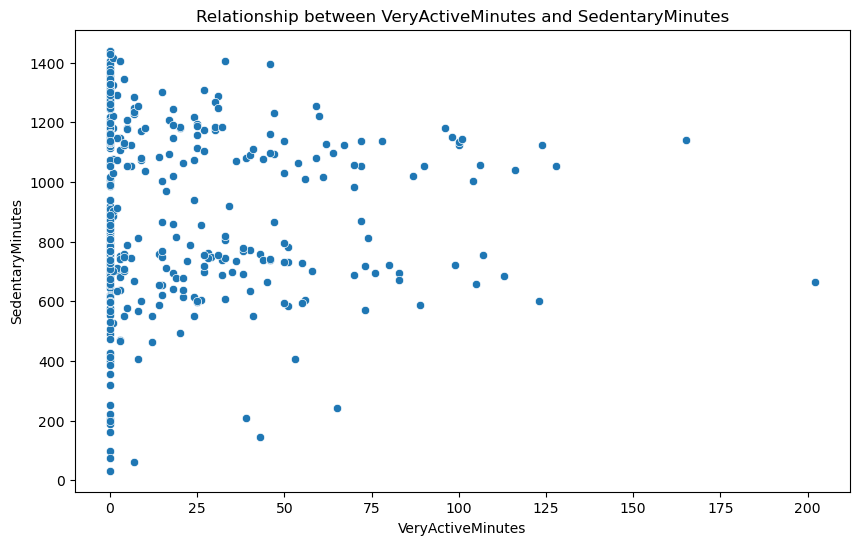

In [40]:
import seaborn as sns

# Check if days with high 'VeryActiveMinutes' compensate with higher 'SedentaryMinutes'
correlation = activity1[['VeryActiveMinutes', 'SedentaryMinutes']].corr()
print(correlation)

# Use a scatter plot showing the relationship between 'VeryActiveMinutes' and 'SedentaryMinutes'
plt.figure(figsize=(10,6))
sns.scatterplot(x='VeryActiveMinutes', y='SedentaryMinutes', data=activity1)
plt.title('Relationship between VeryActiveMinutes and SedentaryMinutes')
plt.show()

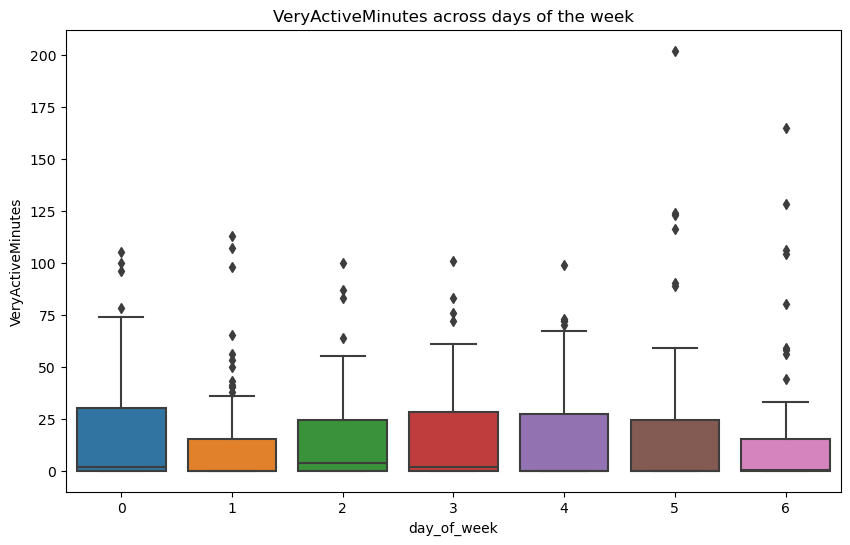

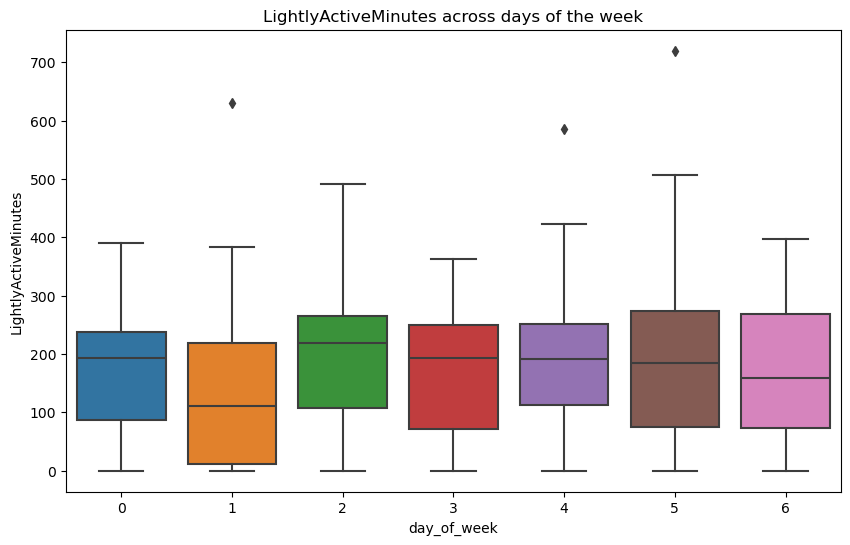

In [43]:
activity1['day_of_week'] = activity1.index.dayofweek
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='VeryActiveMinutes', data=activity1)
plt.title('VeryActiveMinutes across days of the week')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='LightlyActiveMinutes', data=activity1)
plt.title('LightlyActiveMinutes across days of the week')
plt.show()

                   VeryActiveMinutes  SedentaryMinutes
VeryActiveMinutes           1.000000         -0.177652
SedentaryMinutes           -0.177652          1.000000


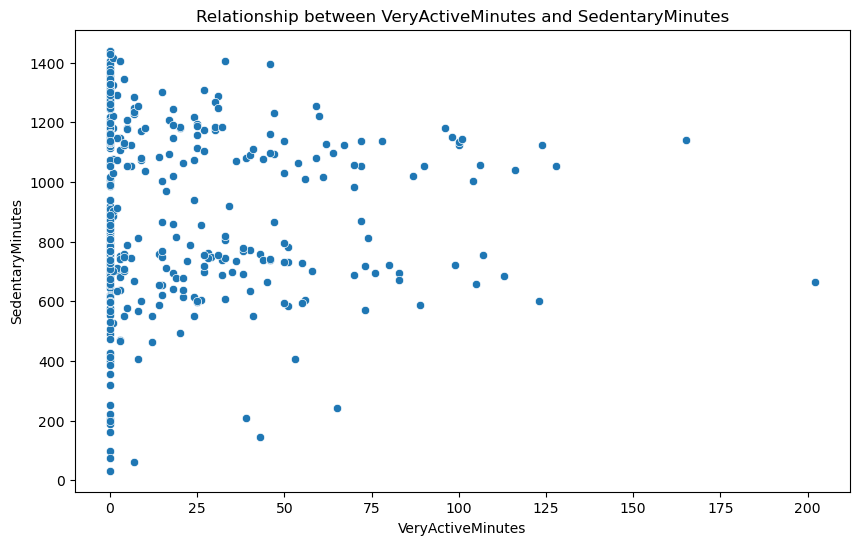

In [45]:
correlation = activity1[['VeryActiveMinutes', 'SedentaryMinutes']].corr()
print(correlation)

plt.figure(figsize=(10,6))
sns.scatterplot(x='VeryActiveMinutes', y='SedentaryMinutes', data=activity1)
plt.title('Relationship between VeryActiveMinutes and SedentaryMinutes')
plt.show()

In [49]:
activity1.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
year                          int32
month                         int32
date                          int32
TotalActiveMinutes            int64
DayOfWeek                     int32
day_of_week                   int32
dtype: object

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

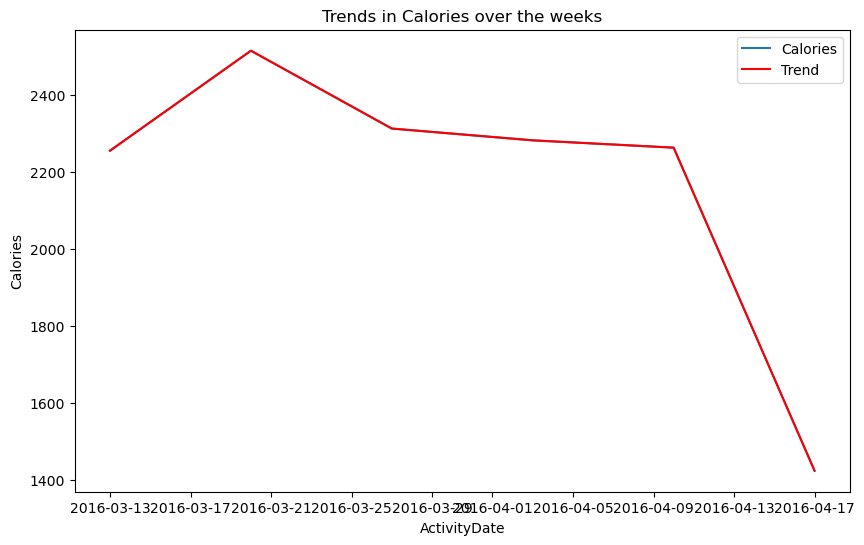

In [50]:
# Convert 'ActivityDate' to datetime format
activity1['ActivityDate'] = pd.to_datetime(activity1['ActivityDate'])

# Set 'ActivityDate' as the index
activity1.set_index('ActivityDate', inplace=True)

# Resample the data to weekly averages
weekly_activity1 = activity1.resample('W').mean()

# Calculate the rolling mean of 'Calories' over a 1-week window
calories_trend = weekly_activity1['Calories'].rolling(window=1).mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=weekly_activity1.index, y=weekly_activity1['Calories'], label='Calories')
sns.lineplot(x=weekly_activity1.index, y=calories_trend, label='Trend', color='red')
plt.title('Trends in Calories over the weeks')
plt.show()